In [79]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading Data

df = pd.read_parquet('C:/Users/uzivatel/Desktop/projekty/data_jobs_python/data_jobs.parquet')

# A bit of cleaning up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) # Convert to a datetime datatype
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Convert from 'str' to a list
df.sort_values(by='job_posted_date', inplace=True) # Sort the data by the date the job was added

# How are the trending skills evolving for Analysts Roles?

### Only Data Analysts in Central Europe region

In [80]:
# Now want only Data Analyst roles
roles = ['Data Analyst']

# Define a list of countries to filter for
countries = ['Czechia', 'Poland', 'Germany', 'Austria', 'Slovakia']

# Filter the DataFrame to include only rows where the job title is in the specified roles and the job country is in the specified countries
df_eur_jobs = df[(df['job_country'].isin(countries)) & (df['job_title_short'].isin(roles))].copy()

In [81]:
# Extract the month from 'job_posted_date' and create a new column 'job_posted_month_no' for the month number
df_eur_jobs['job_posted_month_no'] = df_eur_jobs['job_posted_date'].dt.month

# Explode the 'job_skills' column so that each skill in the list becomes a separate row
df_eur_jobs_expl = df_eur_jobs.explode('job_skills')

# Create a pivot table that counts occurrences of each skill per month
df_eur_jobs_pivot = df_eur_jobs_expl.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_eur_jobs_pivot

job_skills,airflow,alteryx,angular,ansible,asana,asp.net,asp.net core,assembly,atlassian,aurora,...,vue,vue.js,watson,webex,windows,wire,word,wrike,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,22,29,3,3,3,3,0,5,7,2,...,0,1,0,2,20,0,37,0,4,4
2,28,26,1,0,2,1,0,4,8,0,...,0,0,0,0,23,0,46,0,0,3
3,24,19,3,1,0,0,0,3,5,0,...,2,0,0,2,25,0,30,0,0,6
4,23,12,4,1,1,2,1,1,3,2,...,1,1,0,0,18,0,32,1,0,1
5,13,11,3,2,0,0,0,1,2,2,...,2,0,0,0,11,0,26,2,1,1
6,21,15,2,4,0,0,0,2,3,0,...,1,0,0,0,14,0,24,4,4,2
7,16,17,1,2,0,2,0,0,7,0,...,1,0,0,1,9,0,23,0,2,2
8,6,15,2,2,0,2,2,1,1,0,...,0,1,3,0,8,0,25,0,1,0
9,6,15,0,2,0,1,0,4,3,2,...,0,0,0,0,10,1,15,1,1,0


In [82]:
# Add a 'Total' row to the pivot table that sums up the counts of each skill across all months
df_eur_jobs_pivot.loc['Total'] = df_eur_jobs_pivot.sum()

# Sort the columns of the pivot table based on the 'Total' row, in descending order of skill counts
df_eur_jobs_pivot = df_eur_jobs_pivot[df_eur_jobs_pivot.loc['Total'].sort_values(ascending=False).index]

# Now drop the 'Total' row from the pivot table, because it's no longer needed
df_eur_jobs_pivot = df_eur_jobs_pivot.drop('Total')

df_eur_jobs_pivot

job_skills,sql,python,excel,power bi,tableau,r,sap,azure,sas,vba,...,clickup,couchbase,wire,tidyr,mattermost,delphi,elixir,monday.com,f#,fortran
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,662,453,383,279,315,229,160,119,100,81,...,0,1,0,0,0,0,0,0,0,0
2,600,422,359,267,282,206,149,99,102,94,...,0,0,0,0,0,0,0,0,0,0
3,528,363,316,229,232,181,101,85,96,71,...,0,0,0,0,0,0,0,0,0,0
4,461,314,272,218,220,152,105,63,34,57,...,0,0,0,0,0,0,1,1,1,0
5,429,298,247,171,187,119,92,74,38,42,...,0,0,0,0,0,0,0,0,0,0
6,457,330,252,226,200,154,105,65,60,62,...,0,0,0,1,0,0,0,0,0,0
7,489,368,269,207,221,160,103,62,74,42,...,0,0,0,0,0,0,0,0,0,0
8,516,321,281,227,201,148,121,83,60,40,...,0,0,0,0,0,0,0,0,0,0
9,420,299,206,191,177,153,96,72,48,37,...,0,0,1,0,0,0,0,0,0,0


In [83]:
DA_month_jobs = df_eur_jobs.groupby('job_posted_month_no').size()

In [90]:
df_eur_jobs_perc = df_eur_jobs_pivot.div(DA_month_jobs/100, axis=0)
df_eur_jobs_perc

job_skills,sql,python,excel,power bi,tableau,r,sap,azure,sas,vba,...,clickup,couchbase,wire,tidyr,mattermost,delphi,elixir,monday.com,f#,fortran
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,43.754131,29.940516,25.313946,18.440185,20.819564,15.135492,10.575017,7.865169,6.609385,5.353602,...,0.000000,0.066094,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,45.627376,32.091255,27.300380,20.304183,21.444867,15.665399,11.330798,7.528517,7.756654,7.148289,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,45.438898,31.239243,27.194492,19.707401,19.965577,15.576592,8.691910,7.314974,8.261618,6.110155,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,44.757282,30.485437,26.407767,21.165049,21.359223,14.757282,10.194175,6.116505,3.300971,5.533981,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.097087,0.097087,0.097087,0.000000
5,47.666667,33.111111,27.444444,19.000000,20.777778,13.222222,10.222222,8.222222,4.222222,4.666667,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,42.951128,31.015038,23.684211,21.240602,18.796992,14.473684,9.868421,6.109023,5.639098,5.827068,...,0.000000,0.000000,0.0,0.093985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,45.700935,34.392523,25.140187,19.345794,20.654206,14.953271,9.626168,5.794393,6.915888,3.925234,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,47.513812,29.558011,25.874770,20.902394,18.508287,13.627993,11.141805,7.642726,5.524862,3.683241,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,42.000000,29.900000,20.600000,19.100000,17.700000,15.300000,9.600000,7.200000,4.800000,3.700000,...,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [91]:
df_eur_jobs_perc = df_eur_jobs_perc.reset_index()

# Convert 'job_posted_month_no' from a month number to a month name (e.g., 'Jan', 'Feb')
df_eur_jobs_perc['job_posted_month'] = df_eur_jobs_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

# Set the new column 'job_posted_month' as the index of the DataFrame
df_eur_jobs_perc = df_eur_jobs_perc.set_index('job_posted_month')

# Drop the 'job_posted_month_no' column as it is no longer needed
df_eur_jobs_perc = df_eur_jobs_perc.drop(columns='job_posted_month_no')

df_eur_jobs_perc

job_skills,sql,python,excel,power bi,tableau,r,sap,azure,sas,vba,...,clickup,couchbase,wire,tidyr,mattermost,delphi,elixir,monday.com,f#,fortran
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,43.754131,29.940516,25.313946,18.440185,20.819564,15.135492,10.575017,7.865169,6.609385,5.353602,...,0.000000,0.066094,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,45.627376,32.091255,27.300380,20.304183,21.444867,15.665399,11.330798,7.528517,7.756654,7.148289,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,45.438898,31.239243,27.194492,19.707401,19.965577,15.576592,8.691910,7.314974,8.261618,6.110155,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,44.757282,30.485437,26.407767,21.165049,21.359223,14.757282,10.194175,6.116505,3.300971,5.533981,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.097087,0.097087,0.097087,0.000000
May,47.666667,33.111111,27.444444,19.000000,20.777778,13.222222,10.222222,8.222222,4.222222,4.666667,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,42.951128,31.015038,23.684211,21.240602,18.796992,14.473684,9.868421,6.109023,5.639098,5.827068,...,0.000000,0.000000,0.0,0.093985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,45.700935,34.392523,25.140187,19.345794,20.654206,14.953271,9.626168,5.794393,6.915888,3.925234,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,47.513812,29.558011,25.874770,20.902394,18.508287,13.627993,11.141805,7.642726,5.524862,3.683241,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,42.000000,29.900000,20.600000,19.100000,17.700000,15.300000,9.600000,7.200000,4.800000,3.700000,...,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


c:\Users\uzivatel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\uzivatel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


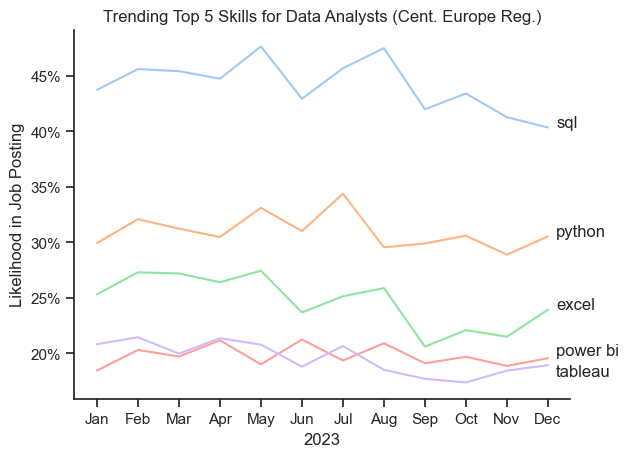

In [123]:
# Select Top 5 Skills of the DataFrame for plotting
df_plot = df_eur_jobs_perc.iloc[:, :5]

# Create a line plot with Seaborn
sns.lineplot(data=df_plot, dashes=False, palette='pastel')
sns.set_theme(style='ticks')
sns.despine()

# Set the labels and title
plt.title('Trending Top 5 Skills for Data Analysts (Cent. Europe Reg.)')
plt.xlabel('2023')
plt.ylabel('Likelihood in Job Posting')
plt.legend().remove()

# Format the y-axis to display percentages with no decimal places
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Annotate the plot with the skill names at the end of the lines
for i in range(5):
    # Get the y-position of the last value for each line
    y_position = df_plot.iloc[-1, i]
    
    # Adjust the position of the text for better readability (fourth and fifth skills overlapped)
    if i == 3:  
        y_position += 0.3
    elif i == 4:
        y_position += -1 
    
    # Add the skill name as text on the plot
    plt.text(11.2, y_position, df_plot.columns[i])

plt.show()